--------------------------------------------------------------------------------------------------------

In [15]:
import pandas as pd

from scipy.sparse import csr_matrix

import matplotlib.pylab as plt


from sklearn.neighbors import NearestNeighbors

In [17]:
electronics_df = pd.read_csv("amazon.csv", 
                             names=['userId', 'productId','Rating','timestamp'])       # dataset is from kaggle
electronics_df = electronics_df.drop_duplicates() #remove duplicate rows
electronics_df.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [18]:
electronics_df.shape

(7824482, 4)

In [19]:
electronics_df=electronics_df.iloc[:1048576,0:]

In [20]:
electronics_df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [21]:
num_users = len(electronics_df.userId.unique())
num_items = len(electronics_df.productId.unique())
print('There are {} unique users and {} unique products in this data set'.format(num_users, num_items))

There are 786330 unique users and 61894 unique products in this data set


In [22]:
electronics_df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


Text(0.5, 1.0, 'Count of Product Ratings per User Id')

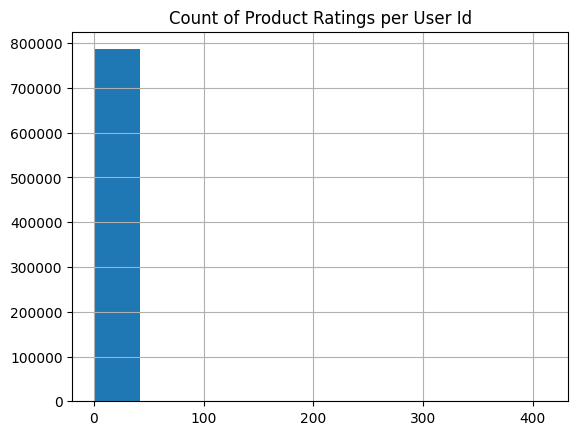

In [23]:
electronics_df[['userId','productId']].groupby(['userId']).count().hist()
plt.title("Count of Product Ratings per User Id")

In [24]:
electronics_df[['userId','productId']].groupby(['userId']).count().describe()

,productId
count,786330.000000
mean,1.333506
std,1.385612
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,412.000000


Text(0.5, 1.0, 'Count of User Ratings per Product Id')

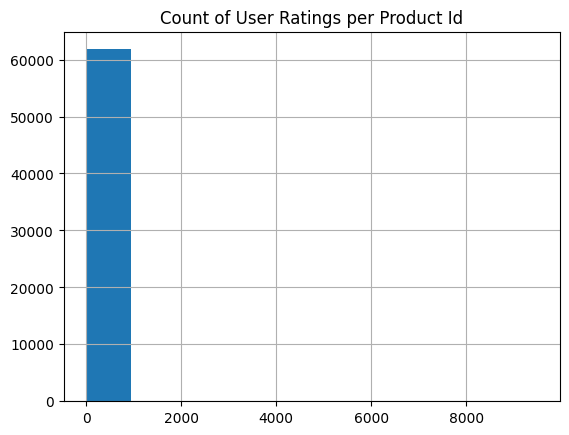

In [25]:
electronics_df[['userId','productId']].groupby(['productId']).count().hist()
plt.title("Count of User Ratings per Product Id")

In [26]:
electronics_df[['userId','productId']].groupby(['productId']).count().describe()

,userId
count,61894.000000
mean,16.941481
std,89.706837
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,9487.000000


<Axes: title={'center': 'Count of Rating Score'}, xlabel='Rating'>

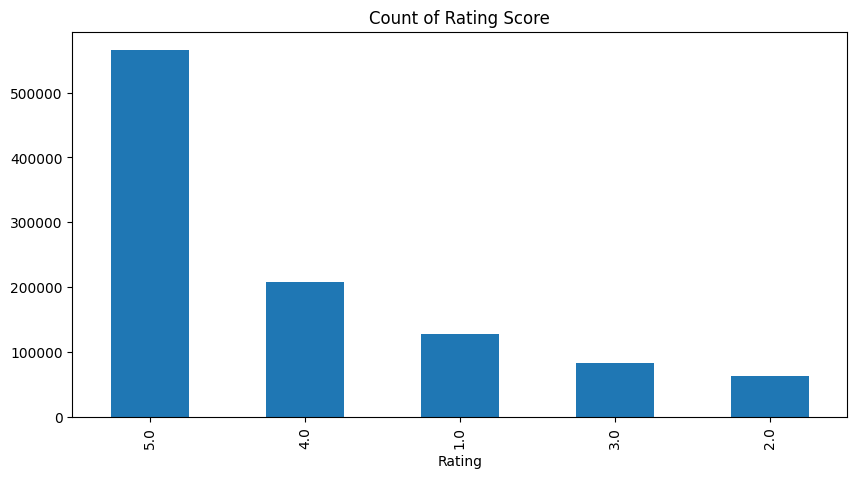

In [27]:
electronics_df['Rating'].value_counts().plot.bar(title="Count of Rating Score",figsize=(10,5))

In [28]:
popularity_thres = 1
electronics_rating_cnt_df = electronics_df[['Rating','productId']].groupby(['productId']).count()
popular_electronics_df = electronics_rating_cnt_df[electronics_rating_cnt_df['Rating']>=popularity_thres]

filtered_pop_electronics_df = electronics_df[electronics_df.productId.isin(popular_electronics_df.index.values)]
print('shape of original ratings data: ', electronics_df.shape)
print('shape of ratings data after dropping unpopular products: ', filtered_pop_electronics_df.shape)

shape of original ratings data:  (1048576, 4)
shape of ratings data after dropping unpopular products:  (1048576, 4)


In [29]:
filtered_pop_electronics_df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [30]:

ratings_thres = 50 

active_users_cnt_df = electronics_df[['Rating', 'userId']].groupby(['userId']).count()
active_users_df = active_users_cnt_df[active_users_cnt_df['Rating']>=ratings_thres]

filtered_active_users_df = electronics_df[electronics_df.userId.isin(active_users_df.index.values)].reset_index()
print('shape of original ratings data: ', electronics_df.shape)
print('shape of ratings data after dropping unpopular products: ', filtered_active_users_df.shape)

shape of original ratings data:  (1048576, 4)
shape of ratings data after dropping unpopular products:  (3456, 5)


In [31]:
filtered_electronics_ratings_df = pd.pivot(filtered_active_users_df,index='productId', columns='userId', values='Rating').fillna(0)
filtered_electronics_ratings_df.head()

userId,A11D1KHM7DVOQK,A12DLJESJKM1OQ,A1435P5AMCPB3X,A149RNR5RH19YY,A15QYHQH80W30L,A1F9Z42CFF9IAY,A1FR68QH6Z4YZM,A1JWSDDIH5Z7DV,A1MJMYLRTZ76ZX,A1ODOGXEYECQQ8,...,A6FIAB28IS79,A7Y6AVS576M03,ABH9D1TEOJ56E,AGHZXQL9F94T9,AGXV8E7XK9J6H,AKT8TGIT6VVZ5,ALUNVOQRXOZIA,AT2J7H5TRZM8Z,AT6CZDCP4TRGA,AWPODHOB4GFWL
productId,,,,,,,,,,,,,,,,,,,,,
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400599997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9043413585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998376234X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000000O48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
electronics_ratings_mat = csr_matrix(filtered_electronics_ratings_df.values)
electronics_ratings_mat

<2943x38 sparse matrix of type '<class 'numpy.float64'>'
	with 3456 stored elements in Compressed Sparse Row format>

In [33]:


model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)


model_knn.fit(electronics_ratings_mat)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [34]:
bought_product = "B00"
print('You have input product:', bought_product)

electronics_matches_df = filtered_active_users_df[filtered_active_users_df['productId'].str.contains(bought_product)]  
electronics_matches_df

You have input product: B00


,index,userId,productId,Rating,timestamp
4,7381,A2AEZQ3DGBBLPR,B000000O48,5.0,1038873600
5,7448,A2R6RA8FRBS608,B000001OL6,4.0,1209513600
6,7748,A680RUE1FDO8B,B000001OMI,5.0,1227744000
7,7789,A11D1KHM7DVOQK,B000001OMN,2.0,1167350400
8,8350,A3NCIN6TNL0MGA,B00000DM9W,5.0,1166918400
...,...,...,...,...,...
3451,1046377,A1ODOGXEYECQQ8,B000IDWDKO,5.0,1217376000
3452,1046507,A250AXLRBVYKB4,B000IE5XIC,5.0,1239408000
3453,1046632,AT6CZDCP4TRGA,B000IE8Z4Q,2.0,1171324800
3454,1047944,AWPODHOB4GFWL,B000IF4788,4.0,1194480000


In [35]:
print("Let's start making recommendations!...")

if(electronics_matches_df is  None):
    print("No Matching product :(")
else:
    
    top_recommendations = 10

    electronics_idx= electronics_matches_df.iloc[0]['productId'] # select the first product in the list, get the product Id
    
    
    electronics_idx = filtered_active_users_df[filtered_active_users_df['productId'] == electronics_idx].index[0]

    
    distances , indices = model_knn.kneighbors(electronics_ratings_mat[electronics_idx],n_neighbors=top_recommendations+1)    

    
    rec_electronics_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = []
 
    
    for val in rec_electronics_indices:
        
        
        electronics_idx = filtered_active_users_df.iloc[val[0]]['productId']
        
        idx = filtered_active_users_df[filtered_active_users_df['productId'] == electronics_idx].index
        
        recommend_frame.append({'Title':filtered_active_users_df.iloc[idx]['productId'].values[0],'Distance':val[1]})

    
    df = pd.DataFrame(recommend_frame,index=range(1,top_recommendations+1))
    display(df.sort_values("Distance")) #sort by distance to get the top 10

Let's start making recommendations!...


,Title,Distance
1,B00006LIOM,0.0
2,B00009J5W0,0.0
3,B00005V63T,0.0
4,B00005OP2T,0.0
5,B000065BP9,0.0
6,B000065BPA,0.0
7,B00005RKTC,0.0
8,B00000K4KH,0.0
9,B00005S0M5,0.0
10,B00006IAAL,0.0


In [ ]:
https://www.kaggle.com/code/gerardamzn/recommender-system-from-amazon-reviews#Let's-compare-the-two-using-RMSE